## Multivariate random variables

Until now, we've only discussed scalar-valued random variables, which produce a single value at a time. In supervised learning, we need to figure something out about the relationship between a vector of predictors $x_i$ and a label $y_i$, which we imagine are generated in pairs by some data factory. We need language to describe that kind of factory.

A multivariate (or vector-valued) random variable is a factory that produces vectors instead of scalars. More formally, it's a mapping between outcomes in the sample space to vectors of numbers. All our old rules still apply: one outcome strictly maps to one vector. We can demonstrate:

In [24]:
def Z(ω): 
    if ω in set([1,8]):
        return (0,0)
    if ω in set([4,5,9]): 
        return (1,0)
    if ω in set([0,2,3]):
        return (0,1)
    if ω in set([6,7]):
        return (1,1)
Z.Ω = set([0,1,2,3,4,5,6,7,8,9]) 

In [25]:
[realize(Z) for i in range(5)]

[(0, 1), (1, 0), (0, 0), (1, 0), (0, 0)]

This is a discrete multivariate random variable because it can only return four possible values: $(0,0)$, $(1,0)$, $(0,1)$, and $(1,1)$. It's also possible to make continuous multivariate random variables:

In [26]:
def Z(ω): 
    z1 = ω**2
    z2 = 1-ω
    return (z1, z2)
Z.Ω = random.random # returns a single number between 0 and 1 when called

In [27]:
[realize_cont(Z) for i in range(5)]

[(0.5496962028475375, 0.25858499958016934),
 (0.028761920510710366, 0.830406602396466),
 (0.8996044333140618, 0.05152520681145045),
 (0.28380703754483994, 0.467264570781293),
 (0.3488473810220482, 0.409366965856084)]

Probabilities are the same for multivariate random variables as they are for univariate random variables: you grab all of the outcomes in the sample space that are destined to become one of the values you're looking for and you measure their relative volume. The calculations do get a little trickier, but the intuition is the same. When we were working with univariate random variables, the sets of interest were usually intervals (i.e. what's the probability that $z$ is between $a$ and $b$?). In the multivariate case, the equivalent of an interval on the number line is a region of the vector space. In general, you can think of a picture like this:

![](2d_rv_preimage.png)

For example, with $\mathbf Z(\omega) = (\omega^2, 1-\omega)$ as it is in our code, let's find the probability that the output vector $z = (z_1,z_2)$ is in the region corresponding to $z_1<0.5$ and $z_2<0.5$. Let's call that region $A = \{(z_1,z_2):z_1<0.5, z_2<0.5)\}$.

In mathematical notation, what we're looking for is $P(\mathbf Z \in A)$ The first thing to notice is $z_1$ will only be less than $0.5$ if $\omega$ is less than $\sqrt{0.5}$, while $z_2$ will only be less than $0.5$ if $\omega$ is greater than $0.5$. Stop and verify both of these facts. We need both conditions to hold, so the set of $\omega$s that place $z$ into the region of interest is $Z^{-1}(A) = [0.5, \sqrt{0.5}] \approx [0.5, 0.707]$. The volume of that set relative to the total sample space $[0,1]$ is $0.707-0.5$, so $P(\mathbf Z \in A) = 0.207$.

The outcomes and sample space are important to the definition of probability for multivariate random variables, but as we discussed in the previous section, we never really talk about the outcomes $\omega$. Usually we define a random variable by directly specifying a probability distribution. That implies there is some sample space that is being mapped to the different realizable values in proportions corresponding to the mass or density function, but we don't actually care what it is. Calculating the probabilities of different realizations is just a matter of integrating or summing the density or mass over the appropriate set.

A multidimensional mass or density function works the same way as a unidimensional mass or density. For some set of realizations $A$,

$$P(\mathbf Z \in A) = \int_A \phi(z) dz$$

or, if $\mathbf Z$ is discrete,

$$P(\mathbf Z \in A) = \sum_{z \in A} \phi(z)$$

In other words, add up the total volume of the outcomes that end up mapping to an realization in $A$- same as before. The only difference is that now $A$ is a region of space instead of an interval on a line.

<div class="alert alert-block alert-warning">
<b>Note:</b> 

$\int_A \phi(z) dz$ may look a little confusing to you because now we're dealing with vectors instead of scalars. But it's just a shorthand for the more elaborate $\int \dots \int \int \phi(z) dz_1 \dots dz_1 dz_2 \dots dz_p$. The issue with writing it out longform is that you then have to specify the limits on each integral that define the borders of the region $A$, which in general will be functions of the other variables that are a pain to derive and write out. It's easier to just say $\int_A \phi(z) dz$ and it means the same thing.
    
</div>

#### Example

Say we have a 2-dimensional random variable $\mathbf Z$ with the following distribution:

$$ 
\phi(z)
= 
\phi([z_1, z_2])
= 
\begin{cases}
1 & \text{for  } z_1, z_2 \in [0,1] \\
0 & \text{else}
\end{cases}
$$

This is the 2-dimensional **uniform** distribution over $[0,1] \times [0,1]$, which is often written $\mathbf Z \sim \text{Unif}([0,1]\times[0,1])$.

<div class="alert alert-block alert-warning">
<b>Note:</b> 
$[0,1] \times [0,1]$ is shorthand for the square set $\{(z_1,z_2) : z_1 \in [0,1], z_2 \in [0,1]\}$.
    
</div>

Let's find the probability that $\mathbf Z$ takes values in the "triangle" $A$ defined by the vertices $[0,0]$, $[1,1]$, and $[1,0]$. Another way to define this is $A = \{(z_1,z_2) : z_1 \in [0,1], 0 \le z_2 \le z_1\}$. 

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Copy this coordinate system onto a piece of paper:
    
<img src='axes.png'>
    
Draw in tick marks for $z_1$ = 1 and $z_2$ = 1. On the $(z_1,z_2)$ plane, lightly shade in the region for which $\phi(z)$ is 1. Shade in the region $A$ (as defined above) more darkly. 
    
On the vertical axis, use the lightly shaded region to draw in the surface of $\phi(z)$.
    
Using geometry, calculate the volume under $\phi(z)$ that's on top of the darkly shaded region $A$. This is $P(\mathbf Z \in A)$.
    
</div>

We can use calculus to get the same answer:

$$
\begin{array}{rcl}
P(\mathbf Z \in A) & = & \int_A \phi(z) dz \\
& = & \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} I_{A}(z) \phi(z) dz_1 dz_2 \\
& = & \int_0^1 \int_0^{z_2} 1 dz_1 dz_2 \\
& = & 1/2
\end{array}
$$

Note that, just as with unidimensional random variables, the density of any multidimensional random variable has to integrate to 1 over its entire support: $\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \phi(z) dz_1 dz_2 = 1$. As before, this is so that the answer to "what is the probability that $z$ is any point in the $(z_1, z_2)$ space at all?" is the intuitive "1". It's also the same as saying that the silo of outcomes has total volume equal to 1.

### Joint Distributions

We often think about multivariate random variables as several different random variables "glued together" into one: 

$$\mathbf Z = [\mathbf Z_1, \mathbf Z_2]$$

Now, instead of talking about the distribution of $\mathbf Z$, we talk about the **joint distribution** of $\mathbf Z_1$ and $\mathbf Z_2$. It's the exact same thing, though. The only advantage of doing this is that we don't have to give the joint variable $\mathbf Z$ a name if we don't care to.

$$ 
\phi_\mathbf{Z}(z)
=
\phi_\mathbf{Z}([z_1, z_2])
=
\phi_{\mathbf Z_1, \mathbf Z_2}(z_1, z_2)
$$

![](2d_joint.png)

What's being glued together are two factories- they still share one silo. Our metaphor gets a little tricky here because the same single nugget of ore $\omega$ now passes simultaneously through both factories to produce the two outputs $z_1$ and $z_2$. As with all metaphors, it can only carry us so far! 

#### Example

Let's look at a joint distribution of two discrete random variables $\mathbf V_1$ and $\mathbf V_2$ that I made up, each of which take values from $\{0,1,2,\dots 9\}$. 

In [28]:
def joint(v1, v2): # v1, v2 in {0,1,2,..9}
    P_raw = np.array(
      [[ 0.,  0.,  1.,  9., 30., 32., 19.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 12., 28., 30., 12.,  5.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 20., 35., 27.,  3.,  4.],
       [ 0.,  0.,  0.,  0.,  8., 21., 38., 39., 11.,  2.],
       [ 0.,  0.,  0.,  0.,  4., 32., 37., 15.,  4.,  1.],
       [ 0.,  0.,  1.,  5., 18., 43., 21.,  8.,  2.,  0.],
       [ 0.,  0.,  6., 25., 35., 25.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 19., 47., 20., 16.,  1.,  0.,  0.,  0.],
       [ 2., 12., 32., 36., 17.,  3.,  0.,  0.,  0.,  0.],
       [ 9., 15., 44., 32.,  7.,  0.,  0.,  0.,  0.,  0.]])
    return P_raw[v1, v2]/np.sum(P_raw) # need to make it so that Σ p_ij = 1 so that this is a valid mass function

We can calculate probabilities using the mass function as usual: $P(\mathbf V_1 =1, \mathbf V_2 = 5) = \phi(1,5)$:

In [29]:
joint(1,5)

0.028

Let's plot the joint mass function as a heatmap so we can get a better feel for it.

<div class="alert alert-block alert-warning">
<b>Python Tip:</b> 

Use <a href='https://docs.python.org/2/library/itertools.html#itertools.product'>`itertools.product()`</a> to get all of the combinations of elements from two or more lists. Wrap it in `list()` if you want a list back instead of a generator. For instance, `list(product([1,2,3],[10,11]))` will give you back the "grid" `[(1, 10), (1, 11), (2, 10), (2, 11), (3, 10), (3, 11)]`. Try it yourself!
</div>

<div class="alert alert-block alert-warning">
<b>Python Tip:</b> 

<a href='https://www.geeksforgeeks.org/zip-in-python/'>`zip(*x)`</a> is a pythonic idiom that "transposes" a list of lists. For instance, if `l = [[1,10], [2,20], [3,30]]`, you'll get back `[[1,2,3], [10,20,30]]`, which you can assign into two lists. This also works for more than two lists. `zip(x)` does the opposite. It works because of <a href='https://treyhunner.com/2018/10/asterisks-in-python-what-they-are-and-how-to-use-them/'>the `*` unpacking operator</a>.
</div>

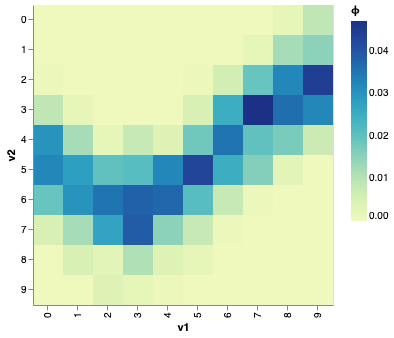

In [32]:
from itertools import product
v1, v2 = zip(*product(range(10), range(10))) # all the possible combinations of (v1, v2)
prob = [joint(v1,v2) for v1, v2 in zip(v1, v2)]

plot_data = pd.DataFrame({'v1':v1, 'v2':v2, 'ϕ':prob})
alt.Chart(plot_data, width=300, height=300).mark_rect().encode(x='v1:O', y='v2:O', color='ϕ')

What we're looking at is the 2D version of the mass plots from before. Think of it as looking down from above onto the stacks of outcomes that are piled up on the labels for the values that they are destined to become. In this case, the darker squares are the piles that are sticking up towards you more. For instance, the square that corresponds to $v_1=6$, $v_2=4$ is a darkish blue because about 3% of all the outcomes in $\Omega$ (whatever it is) get mapped to that combination of values. The square that corresponds to $v_1=9$, $v_2=9$ is a a pale yellow because about 0% of all the outcomes in $\Omega$ get mapped to that combination of values. 

We can also calculate the probability of sets of realization (which are "regions" in the realization space) as we did with our continuous random variable. For example, let's say we're interested in the probability that $\mathbf V_1$ takes a value that is at least 2 units less than $\mathbf V_2$. We can write that as $P(\mathbf V_1 \le \mathbf V_2 - 2)$ or as $P([\mathbf V_1, \mathbf V_2] \in A)$ where $A$ is the region that looks like this:

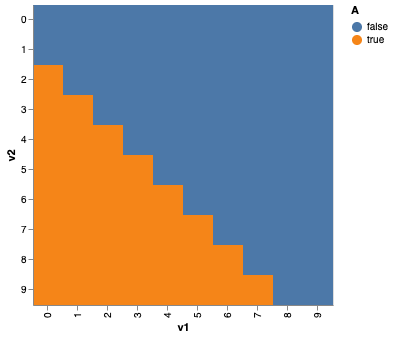

In [33]:
a = np.array(v1) <= np.array(v2)-2

plot_data = pd.DataFrame({'v1':v1, 'v2':v2, 'A':a})
alt.Chart(plot_data, width=300, height=300).mark_rect().encode(x='v1:O', y='v2:O', color='A:N')

To get the probabiity we want, we just need to sum up all the values of the joint mass function that sit on top of the orange region of interest

$$P(\mathbf V_1 \le \mathbf V_2 - 2) = \sum_{v_1 \le v_2-2} \phi(v_1, v_2)$$

In [35]:
sum(joint(v1,v2) for v1, v2 in zip(v1, v2) if v1<=v2-2)

0.454

### Conditional Probabilities

Now that we have joint distributions of multiple variables, we can explore the relationships between those variables. For instance, if we beleive that $[Z_1, Z_2]$ is the factory that generates measurements of people's heights ($z_1$) and weights ($z_2$), can we calculate the probability that someone who is over 2 meters tall weighs more than 80 kilograms?

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

What's the difference between the probability that someone who is over 2 meters tall weighs more than 80 kilograms and the probability that someone is over 2 meters tall and weighs more than 80 kilograms? It might help to invent a population of 10 people with different heights and weights and calculate the proportions that correspond to each of those probabilities to illustrate the difference.
    
</div>

Probabilities like these are called **conditional probabilities**. That's because we're interested in the probability of something, given that some other condition holds. In our example, the "something" is that the person weighs more than 80 kg, and the condition is that the person must be over 2 meters tall. The notation for this is $P(\mathbf Z_2 > 80 | \mathbf Z_1 > 2)$, which is read as "the probability of $\mathbf Z_2 > 80$ given $\mathbf Z_1 > 2$".

How do we calculate that probability, given a joint density or mass? Let's think about it... any probability is just a volume of some subset of the outcomes in the sample space. So what we're really asking for is the volume of the outcomes $\omega$ that map to values of $z_1$ greater than 2 and also $z_2$ greater than 80, relative to the volume of the outcomes that map to values of $z_1$ greater than 2. 

![](conditional_rv.png)

In the picture above, the conditonal probability we're looking for is the ratio of the volumes of the purple oval and the grey circle, which are subsets of the sample space.

We can get the volume of outcomes mapping to a particular region of the realization space (like $z_1>2$) by integrating the density over that region. Thus what we need to do is first integrate the density over the region where heights are more than 2 meters, then do the same for the region where heights are more than 2 meters *and* weights are over 80kg. Then we should divide the latter by the former to get the proportional volume of the two sets of outcomes: 

$$
P(\mathbf Z_2 > 80 | \mathbf Z_1 > 2)
= 
\frac
{P(\mathbf Z_2 > 80, \mathbf Z_1 > 2)}
{P(\mathbf Z_1 > 2)}
= 
\frac
{\int_{z_2 > 80, z_1 > 2} \phi(z_1, z_2) dz_1 dz_2}
{\int_{z_1 > 2} \phi(z_1, z_2) dz_1 dz_2}
=
\frac
{\int_{80}^{\infty} \int_{2}^{\infty} \phi(z_1, z_2) dz_1 dz_2}
{\int_{-\infty}^{\infty} \int_{2}^{\infty} \phi(z_1, z_2) dz_1 dz_2}
$$

It works the same way for discrete random variables:

$$
P(\mathbf V_1 \in A_1 | \mathbf V_2 \in A_2) 
= 
\frac
{P(\mathbf V_1 \in A_1, \mathbf V_2 \in A_2)}
{P(\mathbf V_2 \in A_2)}
= 
\frac
{\sum_{v_1 \in A_1, v_2 \in A_2} \phi(v_1, v_2)}
{\sum_{v_2 \in A_2} \phi(v_1, v_2)}
$$

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Go back to the code we had in the section above that defined a joint density function for two discrete random variables $\mathbf V_1$ and $\mathbf V_2$. Use that density function to calculate $P(V_1 < 4| V_2 > 3)$. The answer you should get is about 0.546.
    
</div>

We can take this idea step further and define the **conditioned random variable** $\mathbf Z_1 | (\mathbf Z_2=z_2)$. This is random variable that you get when you take $\mathbf Z_1$, but subset the sample space $\Omega$ to include only those outcomes where $\mathbf Z_2(\omega) = z_2$. Each different value of $z_2$ defines a different conditioned version of $\mathbf Z_1 | \mathbf Z_2$.

We're getting *really* close to machine learning now. Remember $x_i$ and $y_i$? Let's say we observe $x_i$ but we don't know what $y_i$ is. If those are realizations from some random variables $\mathbf X_i$ and $\mathbf Y_i$, though, and we know their joint density, then we can calculate $P(\mathbf Y_i | \mathbf X_i = x_i)$. That tells us the probability that $Y_i$ is any value we want to know, given that we know what $x_i$ was! We can then find the value or region of $y$ that has the most probability- this would be the most likely label, our best guess for what the unobserved $y_i$ is! Of course, we can't actually know what the real joint density is (we don't see the real factory). But we'll get to that.

The distribution of the random variable $\mathbf Z_1|(\mathbf Z=z_2)$ is easy to extract from the joint distribution: just hardcode the $z_2$ value in the joint distribution to the desired value: $\tilde\phi_{\mathbf Z_1|\mathbf Z_2=z_2}(z_1) = \phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)$. The only wrinkle is that the resulting $\tilde\phi$ will not be normalized so that its total probability across all $z_1$ is 1 (i.e. the new "silo" will not have volume 1). To fix this, we scale the whole function up by dividing by the total area under $\tilde\phi$:

$$
\phi_{\mathbf Z_1|\mathbf Z_2=z_2}(z_1) 
=
\frac
{\phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)}
{\int_{-\infty}^\infty \phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2) dz_1}
$$

or, for discrete random variables:

$$
\phi_{\mathbf Z_1|\mathbf Z_2=z_2}(z_1) 
=
\frac
{\phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)}
{\sum_{z_1} \phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)}
$$

Here is a picture that conveys the idea of conditioning better than a formula can:

![](bivariate_norm_cond.png)

Here you can see two things: 

1. After conditioning on $\mathbf Z_2$, the density is now only a function of $z_1$. The old factory $[\mathbf Z_1, \mathbf Z_2]$ produces two values at a time ($z_1$ and $z_2$). The conditioned factory $\mathbf Z_1 | \mathbf Z_2=z_2$ just produces one: $z_1$. Another way to think about this is that we've taken the original factory and reduced it to the operating conditions under which $z_2$ comes out as a particular value.
2. The conditioned density you get back depends on the value $z_2$ that you condition on. As you scan $z_2$ across its range, the shape of the resulting conditioned distribution will change.

When there more than two dimensions, it's harder to picture this, but the idea is the same. You "slice" the multivariate distribution at the specified place on the specified axis. The conditional distribution can itself also be multivariate: if you have four variables and you slice at a place given by two of them, you'll get back a distribution over the remaining two. 

#### Example

Let's go back to the joint distribution of our friends $\mathbf V_1$ and $\mathbf V_2$:

In [56]:
def joint(v1, v2): # v1, v2 in {0,1,2,..9}
    P_raw = np.array(
      [[ 0.,  0.,  1.,  9., 30., 32., 19.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 12., 28., 30., 12.,  5.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 20., 35., 27.,  3.,  4.],
       [ 0.,  0.,  0.,  0.,  8., 21., 38., 39., 11.,  2.],
       [ 0.,  0.,  0.,  0.,  4., 32., 37., 15.,  4.,  1.],
       [ 0.,  0.,  1.,  5., 18., 43., 21.,  8.,  2.,  0.],
       [ 0.,  0.,  6., 25., 35., 25.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 19., 47., 20., 16.,  1.,  0.,  0.,  0.],
       [ 2., 12., 32., 36., 17.,  3.,  0.,  0.,  0.,  0.],
       [ 9., 15., 44., 32.,  7.,  0.,  0.,  0.,  0.,  0.]])
    return P_raw[v1, v2]/np.sum(P_raw) # need to make it so that Σ p_ij = 1 so that this is a valid mass function

We can implement the conditioning formula to make functions that return conditional probabilities:

In [57]:
def cond_V2_given_V1_is_7(v2):
    return joint(7,v2)/sum(joint(7,v2) for v2 in range(10))

def cond_V1_given_V2_is_4(v1):
    return joint(v1,4)/sum(joint(v1,4) for v1 in range(10))

So $P(\mathbf V_2 = 3 | \mathbf V_1 = 7)$ is... 

In [58]:
cond_V2_given_V1_is_7(3)

0.4476190476190476

And here are the mass plots of the conditional densities:

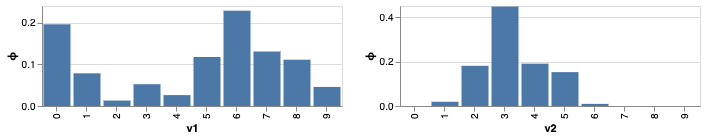

In [60]:
cond_v1 = [cond_V1_given_V2_is_4(v1) for v1 in range(10)]
cond_v2 = [cond_V2_given_V1_is_7(v2) for v2 in range(10)]

v1_plot_data = pd.DataFrame({'v1':range(10), 'ϕ':cond_v1})
v2_plot_data = pd.DataFrame({'v2':range(10), 'ϕ':cond_v2})

v1_plot = alt.Chart(v1_plot_data, height=100, width=300).mark_bar().encode(x='v1:O', y='ϕ')
v2_plot = alt.Chart(v2_plot_data, height=100, width=300).mark_bar().encode(x='v2:O', y='ϕ')

v1_plot | v2_plot

By themselves, I don't think these plots give you that much intuition about conditional distribution. But if you put them next to the joint distribution, you can see that the conditional distributions are what you get when you look at (scaled up) slices of the joint distribution from the side:

![](conditional_joint.png)

To transfer your intuition from the discrete case to the continuous case, do what we did before: imagine the buckets shrinking down smaller and smaller to infinitesimals until the sums become integrals and the mass functions become densities.

### Marginal Probabilities

The "scaling factor" $\int_{-\infty}^\infty \phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2) dz_1$ or $\sum_{z_1} \phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)$ that we need to calculate the conditional distribution of $\mathbf Z_1$ only depends on what the value of $z_2$ is. You can think of it as summing up all the variation over $z_1$ at a given level of $z_2$. This quantity is called the **marginal distribution** of $\mathbf Z_2$ and is usually denoted $\phi_{\mathbf Z_2}(z_2)$. 

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

I just boldly claimed that $\phi_{\mathbf Z_2}(z_2) = \int_{-\infty}^\infty \phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2) dz_1$ is a density function. But we know density functions have to a) integrate to 1 and b) be nonnegative. Show that this is the case for $\phi_{\mathbf Z_2}(z_2)$ as long as $\phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)$ is a valid density (also integates to 1 and is nonnegative). 
    
What about for discrete random variables? What are the equivalent conditions that need to be proved? Can you prove them?
    
</div>

The marginal distribution of $\mathbf Z_2$ is what you get when you consider the factory $[\mathbf Z_1, \mathbf Z_2]$, but completely ignore the outputs $z_1$ and only look at the $z_2$s. You haven't changed the silo $\Omega$ at all (unlike conditioning). Thinking about it in terms of density plots, the 2D *joint* density plot is what you get when you stack up all of the outcomes on top of the labels of the points $(z_1, z_2)$ that they map to. The *marginal* density plot is what you get when you combine all of the stacks of outcomes that have the same $z_2$ label. 

The marginal distribution allows for the calculation of things like $P(\mathbf Z_2 \in A)$ when a joint distribution is given. For example, what if we wanted to know the outright probability that someone is between 1.9 and 2.3 meters tall, regardless of their weight? If we start out with the joint distribution of height and weight, first we have to find the marginal distribution of height (by integrating out the weight variable), then integrate the resulting distribution between 1.9 and 2.3 to get the final answer.

#### Example

Let's return again to $\mathbf V_1$ and $\mathbf V_2$. This time, we'll write functions that compute marginal probabilities:

In [36]:
def marginal_V1(v1):
    return sum(joint(v1, v2) for v2 in range(10))
    
def marginal_V2(v2):
    return sum(joint(v1, v2) for v1 in range(10))

Now we can calculate probabilities like $P(\mathbf V_2 = 5)$:

In [37]:
marginal_V2(5)

0.21999999999999997

As before, we can make mass plots:

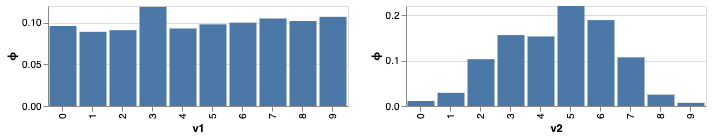

In [38]:
v1, v2 = range(10), range(10)
marg_v1 = [marginal_V1(v) for v in v1]
marg_v2 = [marginal_V2(v) for v in v2]

v1_plot_data = pd.DataFrame({'v1':v1, 'ϕ':marg_v1})
v2_plot_data = pd.DataFrame({'v2':v2, 'ϕ':marg_v2})

v1_plot = alt.Chart(v1_plot_data, height=100, width=300).mark_bar().encode(x='v1:O', y='ϕ')
v2_plot = alt.Chart(v2_plot_data, height=100, width=300).mark_bar().encode(x='v2:O', y='ϕ')

v1_plot | v2_plot

These are fine as-is, but it helps to understand what they mean when you arrange them alongside the joint distribtion like this:

![](marginal_joint.png)

You can see that the marginal distributions are what you get when you "squish" the joint distribution by summing along one axis. The picture also clarifies why it's called a *marginal* distribution: the sums are tallied up on the margins of the figure.

### Relationship between joint, marginal, and conditional distributions

The marginal distribution also allows for a simplified formula to compute conditional distributions, which works for both discrete and continuous random variables:

$$
\phi_{\mathbf Z_1|\mathbf Z_2=z_2}(z_1) 
=
\frac
{\phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)}
{\phi_{\mathbf Z_2}(z_2)}
$$

This is the definition of the conditional distribution, but written with the marginal distribution instead of the elaborated integral or sum. Writing it this way also makes it easy to see that the joint distribution is a product of the conditional and marginal distributions:

$$
\phi_{\mathbf Z_1, \mathbf Z_2}(z_1,z_2)
=
\phi_{\mathbf Z_1|\mathbf Z_2=z_2}(z_1) 
\phi_{\mathbf Z_2}(z_2)
$$

This relationship is so important and so widely referenced that it often gets written in an even more abbreviated way: $\phi_{\mathbf Z_1, \mathbf Z_2} = \phi_{\mathbf Z_1|\mathbf Z_2} \phi_{\mathbf Z_2}$. Just remember this is communicating the same thing as what we have above.

We can also go the other way by conditioning $\mathbf Z_2$ on $\mathbf Z_1$:

$$
\phi_{\mathbf Z_2|\mathbf Z_1} \phi_{\mathbf Z_1}
=
\phi_{\mathbf Z_1, \mathbf Z_2} 
= 
\phi_{\mathbf Z_1|\mathbf Z_2} \phi_{\mathbf Z_2}
$$

which gives us a result called **Bayes' Theorem** (not to be confused with Bayesian statistics):

$$
\phi_{\mathbf Z_2|\mathbf Z_1}
= 
\phi_{\mathbf Z_1|\mathbf Z_2} 
\frac{\phi_{\mathbf Z_2}}{\phi_{\mathbf Z_1}}
$$

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Let's pretend that fruits are generated by some probability distribution that specifies their *color* $\mathbf C$, which can be red, yellow, or green, and their *type* $\mathbf T$, which can be apple, pear, or banana. Basically, we're imagining that a "fruit" is actually a pair of variables $c,t$ which come out of the factory $(\mathbf C, \mathbf T)$, which has some joint mass function $\phi_{\mathbf C, \mathbf T}(c,t)$. 
    
Until this point, we've been extracting conditional and marginal distributions from the joint, but now we will see how conditional and marginal distributions can also be used to reconstruct a joint distribution.

Let's pretend that we know the following: 
- 50% of apples are red, 0% are yellow, 50% are green
- 20% of pears are red, 40% are yellow, 40% are green
- 0% of bananas are red, 90% are yellow, 10% are green
    
Write out each of these nine facts as conditional probabilities. For instance "50% of apples are red" is $P(\mathbf C = \text{red} | \mathbf T = \text{apple}) = 0.5$. These are also statements about the probability mass function: $\phi_{C|T=\text{apple}}(\text{red}) = 0.5$
    
Now let's pretend that 50% of all fruits are apples, 20% are pears, and 30% are bananas. Write the probability mass function for the marginal distribution of $\mathbf T$.

Now we're ready to answer some questions. What is the probability that a fruit is a red apple? In other words, what is $P(\mathbf C = \text{red}, \mathbf T = \text{apple}) = \phi_{\mathbf C, \mathbf T}(\text{red}, \text{apple})$?
    
Now you can any probability under the joint distribution that you like, which means you can calculate <i>any</i> marginals or conditonals. Give it a try: calculate the probability that a fruit is red: $P(\mathbf{C}=\text{red})$.
    
</div>

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Consider three continuous random variables $\mathbf X$, $\mathbf Y$, and $\mathbf Z$. I've written python functions that implement $\phi_{\mathbf Z | \mathbf X = x, \mathbf Y = y}(z)$ and $\phi_{\mathbf X = x, \mathbf Y = y}(x,y)$. 
    
```
from scipy.stats import norm, multivariate_normal

# call this like: conditional_z_xy(0,(2,1)) to get ϕ(Z=0|X=2,Y=1)
def conditional_z_xy(z, condition): 
    x, y = condition
    return norm(x+y,1).pdf(z)

def marginal_xy(x,y):
    return multivariate_normal([0,0], [[1,0.5],[0.5,3]]).pdf((x,y))
```

Use these two to write a python function `joint_xyz` that implements $\phi_{\mathbf X, \mathbf Y, \mathbf Z}(x,y,z)$. What is $\phi_{\mathbf X, \mathbf Y, \mathbf Z}(1,1,2)$? The answer I get is about 0.22.
    
</div>

### Higher dimensions

In higher dimensions, it's possible to "marginalize out" one or several variables at once, which leaves you with a distribution over the remaining variables. For example, if we had a joint distribution of 5 variables given by $\phi_{\mathbf Z_1, \mathbf Z_2, \mathbf Z_3, \mathbf Z_4, \mathbf Z_5}(z_1, z_2, z_3, z_4, z_5)$, we could marginalize out $\mathbf Z_2$ and $\mathbf Z_5$ to get 

$$
\phi_{\mathbf Z_1, \mathbf Z_3, \mathbf Z_4}(z_1, z_3, z_4)
=
\int_{-\infty}^\infty \int_{-\infty}^\infty 
\phi_{\mathbf Z_1, \mathbf Z_2, \mathbf Z_3, \mathbf Z_4, \mathbf Z_5}(z_1, z_2, z_3, z_4, z_5)
dz_2 dz_5
$$

In this case, the "marginal" distribution $\phi_{\mathbf Z_1, \mathbf Z_3, \mathbf Z_4}(z_1, z_3, z_4)$ is itself "joint" between $\mathbf Z_1$, $\mathbf Z_3$, and $\mathbf Z_4$. These "joint marginals" are necessary to condition on multiple variables at once:

$$
\phi_{\mathbf Z_2, \mathbf Z_5|\mathbf Z_1=z_1, \mathbf Z_3=z_3, \mathbf Z_4=z_4}(z_2, z_5) 
=
\frac
{\phi_{\mathbf Z_1, \mathbf Z_2, \mathbf Z_3, \mathbf Z_4, \mathbf Z_5}(z_1, z_2, z_3, z_4, z_5)}
{\phi_{\mathbf Z_1, \mathbf Z_3, \mathbf Z_4}(z_1, z_3, z_4)}
$$

The equations look gross because we're keeping track of all of the individual random variables, but the notation simplifies if use vector-valued (multivariate) random variables to give the different groups of variables their own names:

$$
\mathbf X = [\mathbf Z_1, \mathbf Z_3, \mathbf Z_4]
\quad
\mathbf Y = [\mathbf Z_2, \mathbf Z_5]
$$

$$
\phi_{\mathbf Y|\mathbf X=x}(y) 
=
\frac
{\phi_{\mathbf X, \mathbf Y}(x,y)}
{\phi_{\mathbf X}(x)}
$$

This notation is very common. Just remember that now we are talking about conditioning or marginalizing on a vector-valued random variable instead of a scalar-valued random variable. You can always write it out in the longform notation if you get confused.

![](https://i.imgflip.com/3g9ofp.jpg)

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Here is a density function of three variables that I made up: 
    
$$\phi(z_1, z_2, z_3) 
=
\begin{cases}
8 z_1 z_2 z_3 & \text{if } z_1,z_2,z_3 \in [0,1] \\
0 & \text{else}
\end{cases}
$$
    
I <a href='https://www.wolframalpha.com/input/?i=int+from+0+to+1%28int+from+0+to+1%28int+from+0+to+1+of+%288*x*y*z%29+dx%29dz%29dy'>verified using WorlframAlpha</a> that the total probability is 1, and obviously it's not negative anywyere, so this is a valid density function.
 
Calculate $P(\mathbf Z_1 \in [0,0.1])$. Also calculate $P(\mathbf Z_1 \in [0,0.1]| \mathbf Z_2 = z_2, \mathbf Z_3=z_3)$ for any values $z_2$ and $z_3$ of your choosing. Again, feel free to use WolframAlpha to evaluate the integrals if you don't feel like doing them. What's interesting about this result?

Can you come up with another function $\phi(z_1, z_2, z_3)$ where this interesting result also holds?
    
</div>

## Independence

As you saw in the previous exercise, there are cases where for two random variables $\mathbf U$ and $\mathbf V$ we have $\phi_{\mathbf U | \mathbf  V = v}(u) = \phi_{\mathbf U}(u)$ no matter what $v$ is. In other words, knowing $v$ never gives us any additional information about what $u$ might be. Visually, you can imagine that squishing the distribution along one axis gives you the same result as slicing somewhere along that axis and scaling the result. If this is the case,

$$
\phi_{\mathbf U, \mathbf V}
= 
\phi_{\mathbf U|\mathbf V} \phi_{\mathbf V}
=
\phi_{\mathbf U} \phi_{\mathbf V}
$$

and we say that $\mathbf U$ and $\mathbf V$ are **independent**, which is often written $\mathbf U \perp \!\!\! \perp \mathbf V$. Independence is a property of the *factory* $[\mathbf U, \mathbf V]$. There is no way to definitively know that variables are independent just by looking at the data they produce. 

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

If $\phi_{\mathbf U | \mathbf  V = v}(u) = \phi_{\mathbf U}(u)$ no matter what $v$ is, use Bayes' theorem to show that $\phi_{\mathbf V | \mathbf  U = u}(v) = \phi_{\mathbf V}(v)$ no matter what $u$ is. In other words, show independence goes both ways.
    
</div>

When we're using random variables to model a real-world phenomenon, we transfer our intuition about the real world into conditions that the random variables must satisfy. For instance, if $\mathbf U$ and $\mathbf V$ are the results of two coin flips, saying $\mathbf U$ and $\mathbf V$ are independent is an assumption that the result of one coin flip can't affect the result of the next. It's not actually true, of course, but it's an intuition about the world that we've embedded in our model of it. Remember, however, that we never actually know what the real joint distribution of our data is. One reason independence is such a useful thing to assume is that it lets us break up the joint distribution into two parts that we can make guesses about separately. That often simplifies our models.

It's also possible to have groups of variables that are independent of each other. For instance, if $\phi_{\mathbf Z_2, \mathbf Z_5|\mathbf Z_1=z_1, \mathbf Z_3=z_3, \mathbf Z_4=z_4}(z_2, z_5) = \phi_{\mathbf Z_2, \mathbf Z_5}(z_2, z_5)$ for all $z_1, z_3, z_4$, we'd say $\mathbf Z_2, \mathbf Z_5 \perp \!\!\! \perp \mathbf Z_1, \mathbf Z_3, \mathbf Z_4$. 

<div class="alert alert-block alert-warning">
<b>Python Tip:</b> 

Note that if variables are given to you in terms of their marginal distributions and no joint relationship is specified, the implicit assumption is that they are independent so that the joint distribution is given by the product of the marginals. For instance, if we just say $\mathbf X \sim \mathcal N(0,1)$ and $\mathbf Z \sim \text{Unif}([0,1])$, then by convention we assume that the joint density of the two is the product of the marginals.
    
</div>

### Conditional independence

It's also possible for two random variables $\mathbf U$ and $\mathbf V$ to be **conditionally independent**, given a third $\mathbf Z$. That just means that

$$
\phi_{\mathbf U | \mathbf V, \mathbf Z} = \phi_{\mathbf U | \mathbf Z}
$$

Or, equivalently, $\phi_{\mathbf U, \mathbf V | \mathbf Z} = \phi_{\mathbf U | \mathbf Z} \phi_{\mathbf V | \mathbf Z}$, and $\phi_{\mathbf U, \mathbf V, \mathbf Z} = \phi_{\mathbf U | \mathbf Z} \phi_{\mathbf V | \mathbf Z} \phi_{\mathbf Z}$. 

Conditional independence means that knowing the value of $u$ doesn't tell us anything about the value of $v$ above and beyond what $z$ does. Variables that are independent don't have to be conditionally independent, and vice-versa. An easy example to see this is in is $\mathbf U = \mathbf V = \mathbf Z$. In this example, $\mathbf U$ and $\mathbf V$ can't possibly independent because knowing $u$ means we know $v$ exactly. But if we already know $z$, $u$ actually can't tell us anything more about $v$ that we don't already know, so they are conditionally independent. Weird, but that's how it is.

As with independence, conditional independence is a way of embedding our assumptions about the world into our probabilistic models. For instance, let's say that $\mathbf U$ is how long it takes me to get to work one morning, $\mathbf V$ is how long it takes my partner, and $\mathbf Z$ is the total strain on public transit in the city. Our commutes don't affect each other, but they are both affected by delays on public transit. If there are no other factors that affect both of our commutes, then it's reasonable to assume that our commute times are are conditionally independent given the transit strain. Knowing how long it took her to get to work won't tell you anything about how long it took me if you already know what the transit strain was like. But if you don't know the transit strain and I tell you it took me a long time to get to work, it's likely that it also took my partner a long time. Thus the two variables aren't independent,  just conditionally indpendent.

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Let's say the amount of time it takes me to get to work on a particular morning is determined by a random variable $\mathbf U$ and the amount of time it takes my partner is given by $\mathbf V$. The transit strain, which is affected by a lot of things, is all rolled up into one number represented by $\mathbf Z$.
    
If $\mathbf Z \sim \mathcal N(0,1)$ and $\mathbf V|(\mathbf Z=z) \sim \mathcal N(20+5z,3)$ and $\mathbf U|(\mathbf Z=z) \sim \mathcal N(30+4z,7)$, what is $P(\mathbf U < 20, \mathbf V < 20)$? That is, what's the probability that we both get to work in under 20 minutes? You can express your answer in terms of integrals of a function of $u$, $v$, and $z$. No need to compute the integrals.
    
</div>

## Transformation of Random Variables

The last thing we need before getting into machine learning is a way to do algebra with random variables. For instance, what if I have a data factory $\mathbf U$, which makes $u$s and a factory $\mathbf V$ that makes $v$s. But instead of showing you $u$ and $v$, I add them together and just show you $z = u+v$. You don't know about $\mathbf U$ or $\mathbf V$. From your perspective, there is a factory somewhere called $\mathbf Z$ that's making the $z$s. Similarly, what if instead of $v$ I showed you $z = v^2 + 6$? Again, you would only think there were a $\mathbf Z$ factory.

We can apply all of our usual algebraic tools to random variables: adding and subtracting them, multiplying them, applying functions, etc. etc. You can think of all of this as "post-processing" of the realization(s) produced by the random variable(s). The key insight is that if you step back, you still have something that's mapping outcomes in the sample space to realizations: that's a random variable. Here's a visual example where two variables $\mathbf U$ and $\mathbf V$ are transformed by some function $h$ to produce what acts like a single random variable $\mathbf Z$. We write this $\mathbf Z = h(\mathbf V, \mathbf U$):

![](transform_rv.png)

The question is: how do statements about the probability of $\mathbf U$ or $\mathbf V$ translate to statements about the probability of $\mathbf Z$? In other words, what's $P(\mathbf Z \in A)$ in terms of probabilities or $\mathbf U$ and $\mathbf V$? 

Ultimately, the probability of a set of realizations is the volume of outcomes in the sample space that correspond to that set. With a single variable, working back from the set of realizations $A$ to the set of outcomes that correspond to those is a one-step process: find whatever $\mathbf Z^{-1}(A)$ is, then get its volume. But now we have to work back through a chain of transformations. First we need to find the set of points $[u,v]$ that map to $z \in A$ under the transformation $h$. Call that set $h^{-1}(A)$. Now we need to find the set of outcomes that produce $[u,v] \in h^{-1}(A)$. Call that set $[\mathbf U, \mathbf V]^{-1}(h^{-1}(A))$  Finally, we need to find the volume of that set: $\mathbb P([\mathbf U, \mathbf V]^{-1}(h^{-1}(A)))$. If we have the joint density of $\mathbf U$ and $\mathbf V$, we can automate the last step:

$$P(\mathbf Z \in A) = \mathbb P([\mathbf U, \mathbf V]^{-1}(h^{-1}(A))) = \int_{h^{-1}(A)} \phi_{\mathbf U, \mathbf V}(u,v) du dv$$

with the integral replaced by a sum over $A$ if $\mathbf U$ and $\mathbf V$ are discrete. 

We can illustrate with our example in code. Let's say $\mathbf V_1$ and $\mathbf V_2$ are distributed with the mass function shown below (same as what we were working with before):

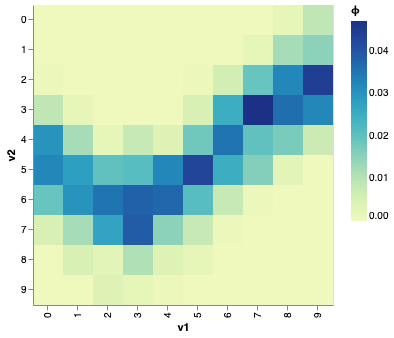

In [61]:
v1, v2 = zip(*product(range(10), range(10))) # all the possible combinations of (v1, v2)
prob = [joint(v1,v2) for v1, v2 in zip(v1, v2)]

plot_data = pd.DataFrame({'v1':v1, 'v2':v2, 'ϕ':prob})
alt.Chart(plot_data, width=300, height=300).mark_rect().encode(x='v1:O', y='v2:O', color='ϕ')

Now let's say $\mathbf Z = \mathbf V_1 + 3\mathbf V_2^2$. What's $P(\mathbf Z < 10)$? For $\mathbf Z$ to be less than $10$, $\mathbf V_1 + 3\mathbf V_2^2$ has to be less than $10$, so that defines the region we have to sum over:

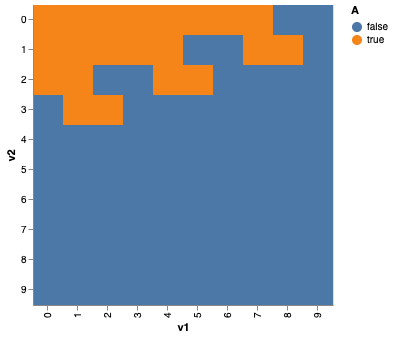

In [44]:
a = np.array(v1) + 3*np.array(v2)^2 < 10

plot_data = pd.DataFrame({'v1':v1, 'v2':v2, 'A':a})
alt.Chart(plot_data, width=300, height=300).mark_rect().encode(x='v1:O', y='v2:O', color='A:N')

That is, for $h(v_1, v_2) = v_1 + 3v_2^2$, the preimage $h^{-1}((-\infty, 10])$ is $\{[v_1, v_2]: v_1 + 3v_2^2 < 10\}$, which is the set illustrated above in orange.

And, as usual, to calculate the probability of a realization in this region we simply sum up the joint distribution over the region:

In [62]:
sum(joint(v1,v2) for v1, v2 in zip(v1, v2) if v1 + 3*(v2**2) < 10)

0.011

There you have it. This is often more difficult with continuous random variables since finding preimages and integrating over weird sets can be a hassle. But the basic idea is the same, regardless of how much bean-counting you have to do to get the result. The point isn't to be able to do it, it's to understand what is happening in theory.

### Joint and conditional distributions of transformed variables

Let's go back to our factories $\mathbf U$ and $\mathbf V$. The outputs $u$ and $v$ are transformed together with some postprocessing $h$ to give $z$, so it looks like there is just one factory $\mathbf Z$. But what if I showed you $u$, $v$, and $z$ without telling you that $z$ actually comes from transforming $u$ and $v$? It would then look to you like a factory $[\mathbf U, \mathbf V, \mathbf Z]$. And, indeed, we can define joint, conditional, and marginal distributions on these random variables just as we had when they weren't transformations of each other. That will let us calculate things like the probability that $\mathbf U$ is 4 if $\mathbf Z$ is 10.

This is important for machine learning. For example, if we assume that $\mathbf U$ is the "code" that determines whether or not a cat walks into the frame of a picture when it is being taken, and $h()$ is a function that translates the presence or absence of that cat, as well as a bunch of other variables $\mathbf V$ (like what else is in the frame) into a matrix of pixels $z$. Then $\mathbf Z = h(\mathbf U, \mathbf V)$ and $P(\mathbf U=1|\mathbf Z=z)$ is the probability that there is a cat in a picture, given that we observe the pixels $z$. 

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Let's say $\mathbf U$ and $\mathbf V$ are some discrete random variables with some joint mass $\phi_{\mathbf U, \mathbf V}$ and let $\mathbf Z = \mathbf U + \mathbf V$. 

What is $P(\mathbf Z=2 | \mathbf U=1, \mathbf V=0)$? In other words, if we see $u$ is 1 and $v$ is 0, what's the chance that $z$ comes out as 2? Why does it not matter what the joint mass $\phi_{\mathbf U, \mathbf V}$ is? What other values of $z$, $u$, and $v$ is this the case for?
    
For any values $u$ and $v$, what is $P(\mathbf Z=u+v | \mathbf U=u, \mathbf V=v)$ in terms of $\phi_{\mathbf U, \mathbf V}(u,v)$?
    
Use what you have to find a way to write the whole conditional mass $\phi_{ \mathbf Z | \mathbf U, \mathbf V}$ in terms of $\phi_{\mathbf U, \mathbf V}$.
    
What is the joint mass $\phi_{\mathbf U, \mathbf V, \mathbf Z}$? Recall the relationship between conditional, joint, and marginal distributions.
    
What is the joint mass $\phi_{\mathbf U, \mathbf V, \mathbf Z}$ in terms of $\phi_{\mathbf U, \mathbf V}$ if $\mathbf Z = h(\mathbf U, \mathbf V)$ instead of $\mathbf Z =\mathbf U + \mathbf V$?
    
</div>

Sometimes you will see conditions that are transformations of random variables. For instance, what's $P(\mathbf V_1 < 5 | \mathbf V_1 + \mathbf V_2 = 10)$? One way to understand that conditioning mathematically is to break it down into two steps. First create a new variable $\mathbf Z = \mathbf V_1 + \mathbf V_2$, then calculate $P(\mathbf V_1 | \mathbf Z = 10)$. Alternatively, you can calculate the sums/integrals directly by integrating the joint density over the appropriate regions:

In [54]:
numerator = sum(joint(v1,v2) for v1, v2 in zip(v1, v2) if v1 + v2 == 10 and v1 < 5)
denominator = sum(joint(v1,v2) for v1, v2 in zip(v1, v2) if v1 + v2 == 10)
numerator/denominator

0.3147410358565737

But, more generally, you can also derive whole densities that are conditioned on transformations, like $\phi_{\mathbf V_1 | \mathbf V_1 + \mathbf V_2 = 10}(v_1)$.

## Describing random variables

No matter how we get to it, all the information we need about a random variable is contained within its mass or density function. But sometimes we don't need to know every detail. Sometimes we just want a summary. Maybe we just want to know how tall the factory is, so we know about what the average size of its products is. Or how wide the factory is, so we can get an idea of how varied the products are.

### Expectation

The **expectation** (or **expected value** or **mean**) of a random variable is often said to describe its "average" product. In some ways, I think that puts the cart before the horse: it's really averages that approximate expectations and not the other way around.

The expectations of continuous and discrete random variables are given by the quantities:

$$
\mu(\mathbf Z)
=
\int z\phi_{\mathbf Z}(z) dz
\quad\quad
\mu(\mathbf Z)
=
\sum z\phi_{\mathbf Z}(z)
$$

where the integral or sum are taken over the entire support of the random variable $\mathbf Z$, whatever it may be.

If you look at these and don't see the connection to an "average" quantity, you're not alone. But let's look a little more closely. The average (or **sample mean**) of $n$ numbers $[z_1, z_2, \dots z_n]$ that we know from primary school is $\frac{1}{n} \sum z_i$: add all the numbers up and divide by how many of them there are. There's another way to compute the same thing, though. First, we find all of the unique values of $[z_1, z_2, \dots z_n]$. Say those are $[x_1, x_2, \dots x_m]$ where $m$ is the total number of unique values in $z$ (for instance, maybe $x_1 = z_{2} = z_{3} = z_{5}$, $x_2 = z_{1} = z_{4}$, and so on). Now we count how many elements of $z$ take on each of those unique values and save those numbers in a vector $[n_1, n_2, \dots n_m]$. That means there are $n_1$ $z$s with the value $x_1$, $n_2$ with the value $x_2$, etc. Now we can group up the elements in the sum:

$$
\frac{1}{n} \sum z_i 
= 
\frac{1}{n} \left( \underset{\text{all }=x_1}{\underbrace{(z_{2} + z_3 + z_5)}} + \underset{\text{all }=x_2}{\underbrace{(z_{1} + z_4)}} + \dots \right)
= 
\frac{1}{n} (n_1x_1 + n_2x_2 + \dots n_mx_m)
= 
\sum x_j \frac{n_j}{n} 
=
\sum x_j p_j
$$

where $p_j = n_j/n$ is the proportion of $z$s that take the value $x_j$. Check it out:

In [72]:
z = [4,8,6,7,2,8,4,5,1,5,9,4,8,3,1,3,0,0,2,0]
np.mean(z) # np.mean() calculates the sample mean

4.0

In [73]:
x,n = np.unique(z, return_counts=True)
print(x,n)

[0 1 2 3 4 5 6 7 8 9] [3 2 2 2 3 2 1 1 3 1]


In [70]:
p = n/len(z)
np.sum(x*p)

4.0

Compare that final sum to the mean of the discrete random variable $\mathbf Z$. Instead of $\phi$ we have a $p$, but these are both proportions of some kind since $\phi(z) = P(Z=z)$ is the proportion of outcomes that lead to the realization $z$. The other difference is that the sum in $\sum x_j p_j$ is taken over all $x_j$, which are all the unique values of $z$, whereas $\sum z\phi_{\mathbf Z}(z)$ is taken over the support of $\mathbf Z$. But again, that's basically the same idea: the support of $\mathbf Z$ is precisely the set of all unique values that $\mathbf Z$ can take. The extension to the continuous case just replaces the sum with an integral.

It's important not to confuse analogy and intuition with reality, though: the expectation and sample mean are not the same thing. If $z$ is a set of realizations from $\mathbf Z$, there is no guarantee that we will collect enough $z$s to span the entire support of $\mathbf Z$ (in the continuous case, we are guarenteed not to), and there is no guarantee that the $z$s will appear in proportions that are exact to $\phi$. The expectation, in a sense, is the sample mean of the data we would observe if we pushed every single outcome $\omega$ from $\Omega$ through $\mathbf Z$ exactly once. If $\Omega$ is infinite, we're talking about an infinite dataset.

We'll demonstrate using our old friend:

In [75]:
def Z(ω): # factory (random variable)
    if ω in set([1,4,5,8,9]): # these are the outcomes (nuggets) that map to the value 1 
        return 1
    if ω in set([0,2,3,6,7]): # these are the outcomes (nuggets) that map to the value 0 
        return 0
Z.Ω = set([0,1,2,3,4,5,6,7,8,9]) # sample space (silo) of outcomes (ore nuggets) attached to Z
    
def realize(rand_var): # run the assembly line!
    ω = random.sample(rand_var.Ω, 1)[0] # grab a single nugget out of the silo at random
    return rand_var(ω) # push it through the factory

We know the support of this random variable is $\{0,1\}$ (these are the only values it can take) and its mass function is $\phi(0) = 0.5$ and $\phi(1) = 0.5$. So $\mu(\mathbf Z) = \sum z\phi_{\mathbf Z}(z) = 0\phi(0) + 1\phi(1) = 0.5$. That's also what we get when we take the sample mean of the data we would see by pushing each element of $\Omega$ through $\mathbf Z$ exactly once:

In [76]:
np.mean([Z(ω) for ω in Z.Ω])

0.5

But for a generic sample of realizations, we are not guaranteed to get the same answer:

In [78]:
np.mean([realize(Z) for i in range(20)])

0.55

Succinctly: the sample mean is a property of a *particular dataset*. Expectation is a property of the *random variable*. The sample mean is like taking a bunch of iphones from a factory and asking what the average iphone is like. The expectation is like looking at the factory itself. But, of course, we never do see the real factory, so expectation is ultimately just a (very important) tool to help us imagine what that real factory is like.

#### Multivariable Expectation

#### Conditional Expectation

#### Rules for Expectation

- linearity: sum of RVs, product with scalar
- transformation: lazy statistician

### Variance

# Chapter summary

Multivariate random variables can also be seen as groups of single random variables, in which case their distribution is called a joint distribution over those variables. The joint can be integrated/summed to yield the probability that a set of conditions on all the variables is simultaneously satisfied.

The joint distribution can also be used to calculate conditional probabilities, which are the probabilities that one or more random variables satisfy a condition, given that other random variables satisfy some other conditon. We used our intuition about the sample space to realize that conditional probabilities are just ratios of volumes of subsets of the sample space. Thus we can calculate conditional probabilities by taking the ratio of two integrals or sums of the joint density or mass function.

We took the idea further to define conditioned random variables, which are random variables that operate on a subset of the original sample space that's defined by a condition on other random variables. The conditional distribution is easy to extract from the joint: just hardcode the value of the conditioning variables in the joint distribution, and divide by a scaling factor so that the conditioned distribution still integrates/sums to 1.

It turns out that the scaling factor, when viewed as a function of the hardcoded value, is itself a probability distribution that we call the marginal. That allows us to write any joint distribution as a product of a conditional distribution and a marginal distribution. Bayes theorem uses that relation to equate different products of conditional and marginal distribution via the joint distribution. 

We also saw that there are joint distributions where conditioning on some variables gives you the same result as marginalizing them out. When this is the case, we say that the variables that are marginalized out are independent from those that you have the marginal of. Independence lets us factor the joint distribution into a product of marginals. Independence means that information about one variable (or set of variables) doesn't tell you anything about another (or another set). A similar factorization holds if the variables are only conditionally independent, which means that information about one variable (or set) doesn't tell you anything about another above and beyond what the conditioning variable or variables tell you.

Lastly, we saw that random variables can be transformed algebraically to yield new random variables. The key to figuring out how the distributions are related is to know how to find the pre-image of sets under the transformation. We also saw that transformations can be marginalized over, conditoned on, etc. just the same as other random variables.